# Изучение закономерностей, определяющих успешность игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - проанализировать данные о компьютерных играх для выявления закономерностей, определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Исследование пройдет в 6 этапов:
1. Обзор данных.
        1.1 Откроем файл с данными и изучим общую информацию.
2. Предобработка данных.
        2.1 Заменим названия столбцов.
        2.2 Обработаем пропуски при необходимости.
        2.3 Преобразуем данные в нужные типы.
        2.4 Проверим данные на явные и неявные дубликаты.
        2.5 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
3. Исследовательский анализ данных.
        3.1 Посмотрим, сколько игр выпускалось в разные годы.
        3.2 Посмотрим, как менялись продажи по платформам.
        3.3 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
        3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
        3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
        3.6 Соотнесем выводы с продажами игр на других платформах.
        3.7 Посмотрим на общее распределение игр по жанрам.

4. Портрет пользователя каждого региона.
        Определим для пользователя каждого региона (NA, EU, JP):
        4.1 Самые популярные платформы (топ-5). Опишем различия в долях продаж.
        4.2 Самые популярные жанры (топ-5). Поясним разницу.
        4.3 Влияние рейтинга ESRB на продажи.
5. Проверка гипотез.
        5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод.

### Обзор данных.

#### Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(10))
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Вывод**

В основных данных содержится информация о компьютерных играх. Часть данных описывает различные характеристики самой игры: название, платформа, год выпуска, жанр. Часть данных описывает продажи игр: продажи в Северной Америке, в Европе, в Японии и в других странах. Остальные данные рассказывают об оценках: оценка критиков, оценка пользователей и рейтинг от организации ESRB.

Датафрейм содержит 11 столбцов.  Из них 6 столбцов с типом данных `float64`:
* `Year_of_Release` — год выпуска;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100).

5 столбцов с типом данных `object`:
* `Name` — название игры;
* `Platform` — платформа;
* `Genre` — жанр игры;
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество строк в столбцах различается. Значит, в данных есть пропущенные значения. Также в данных присутствуют некорректные названия столбцов и некорректный тип данных. 

### Предобработка данных.

#### Заменим названия столбцов.

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели названия всех стобцов к нижнему регистру.

#### Обработаем пропуски при необходимости.

In [6]:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Удалим строки с пропусками в столбцах `year_of_release`, `name` и `genre`, так как их мало. 

In [7]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])
data.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Изучим уникальные значения в столбце `user_score`.

In [8]:
data['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Аббревиатура "tbd" означает "to be determined", то есть "будет определено". Заменим это значение на nan.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.NAN)
data.isna().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Так как в столбцах в столбцах `critic_score`, `user_score` и `rating` пропущенных значений много, мы не стали удалять данные строки и заполнять их. Пропущенные значения, которые мы оставили без исправлений, – важный сигнал, который тоже нужно учитывать. Причинами пропусков в данных является как человеческий фактор (например, у ряда игр могло быть мало оценок, поэтому их не внесли в данные), так и технические ошибки (например, ошибки при парсинге данных).

#### Преобразуем данные в нужные типы.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Преобразовали тип данных в столбце `year_of_release` на int, так как год – это целое число. В столбце `user_score` преобразовали тип данных на float64, так как в столбце представлены только числовые значения. 

#### Проверим данные на явные и неявные дубликаты.

In [12]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим данные на неявные дубликаты по столбцам `name`, `platform` и `year_of_release` одновременно.

In [13]:
data.duplicated(['name', 'platform' ,'year_of_release']).sum()

1

Обнаружен 1 неявный дубликат, который можно удалить.

In [14]:
data = data.drop_duplicates(['name', 'platform' ,'year_of_release'])
data.duplicated(['name', 'platform' ,'year_of_release']).sum()

0

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Добавили столбец с суммарными продажами во всех регионах.

**Вывод**

На этапе предобработки данных названия всех стобцов были приведены к нижнему регистру. В 6 столбцах были выявлены пропущенные значения, в 3 из них строчки с пропущенными значениями были удалены. В столбце `user_score` значение "tbd" было заменено на nan. В двух столбцах был преобразован тип данных. Также были обнаружены и удалены неявные дубликаты и добавлен столбец с суммарными продажами во всех регионах.

### Исследовательский анализ данных.

#### Посмотрим, сколько игр выпускалось в разные годы.

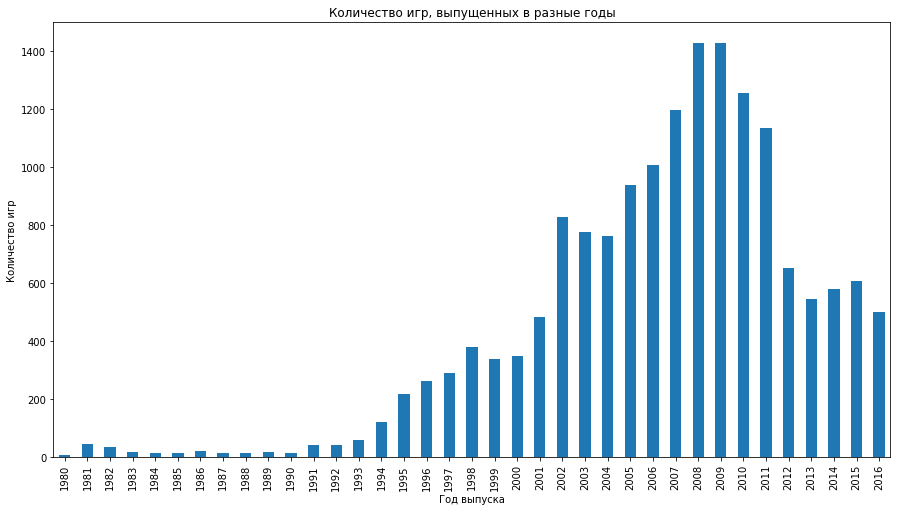

In [17]:
(data
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', figsize=(15, 8), legend=False)
)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

На диаграмме видно, что c 1994 года количество выпущенных игр резко увеличивается. Следущий скачок заметен в 2002 году, а в 2008 и 2009 наблюдается наибольшее количество игр. После 2009 года можно заметить спад количества выпущенных игр. Данные за период 1980-1993 год можно не принимать во внимание, в это время выходило очень мало игр, так как основные игровые платформы еще не появились.

#### Посмотрим, как менялись продажи по платформам.

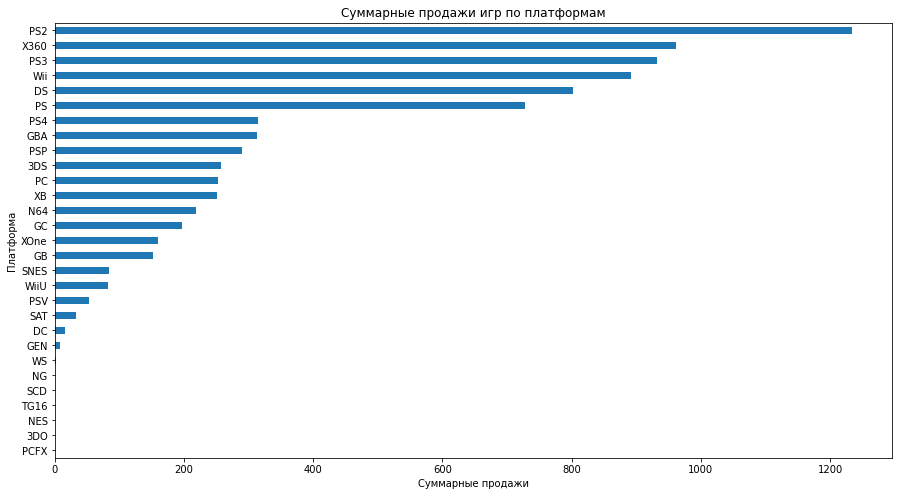

In [18]:
(data
 .query('year_of_release > 1993')
 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .sort_values(by='total_sales', ascending=True)
 .plot(y = 'total_sales', kind = 'barh', figsize=(15, 8), legend=False)
)
plt.title('Суммарные продажи игр по платформам')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа');

In [19]:
temp = data.copy() 
list(temp.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:6])

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Можно выделить 6 наиболее продаваемых платформ: PS2, X360, PS3, Wii, DS, PS.

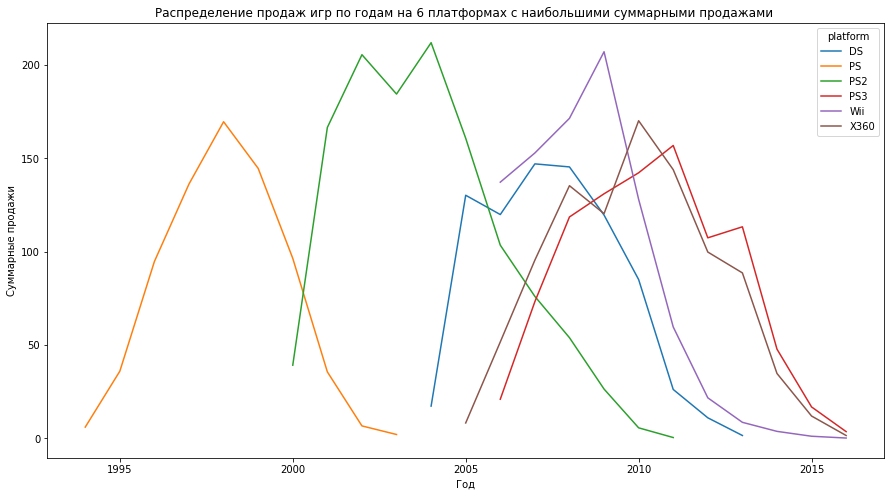

In [21]:
(data
 .query('year_of_release > 1993 and platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(figsize=(15, 8), legend=True)
)
plt.title('Распределение продаж игр по годам на 6 платформах с наибольшими суммарными продажами ')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

In [22]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Примерно за 7 лет исчезают старые платформы и появляются новые.

#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Исходя из предыдущего исследования, для прогноза на 2017 год изучим период в 7 лет, начиная с 2010 года. Построим график распределения продаж игр на пллатформах с 2010 по 2016 год.

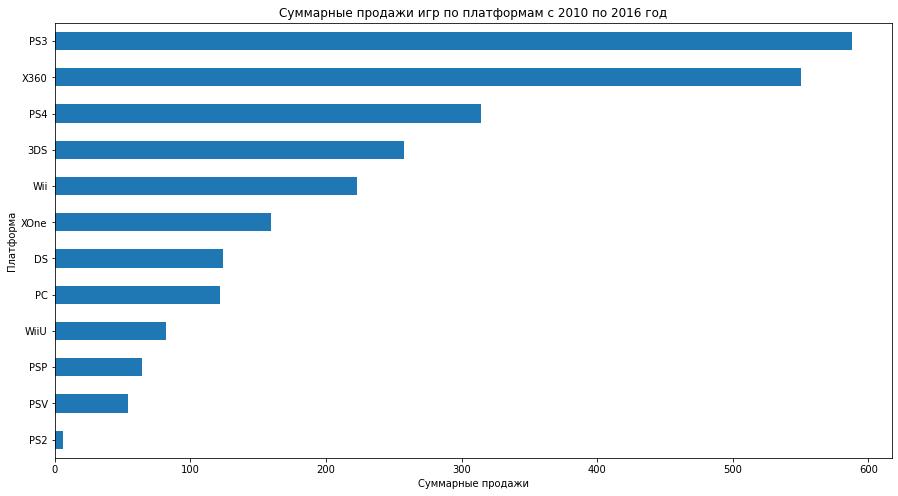

In [24]:
(data
 .query('year_of_release >= 2010')
 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
 .sort_values(by='total_sales', ascending=True)
 .plot(y = 'total_sales', kind = 'barh', figsize=(15, 8), legend=False)
)
plt.title('Суммарные продажи игр по платформам с 2010 по 2016 год')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа');

In [25]:
temp = data.copy() 
top_platforms = temp.query('year_of_release >= 2010').groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:10]
list(top_platforms)

['PS3', 'X360', 'PS4', '3DS', 'Wii', 'XOne', 'DS', 'PC', 'WiiU', 'PSP']

По суммарным продажам за период с 2010 по 2016 год лидируют PS3 и X360. Выберем 10 платформ, которые лидируют по продажам: PS3, X360, PS4, 3DS, Wii, XOne, DS, PC, WiiU, PSP. Построим график распределения продаж с 2010 по 2016 год.

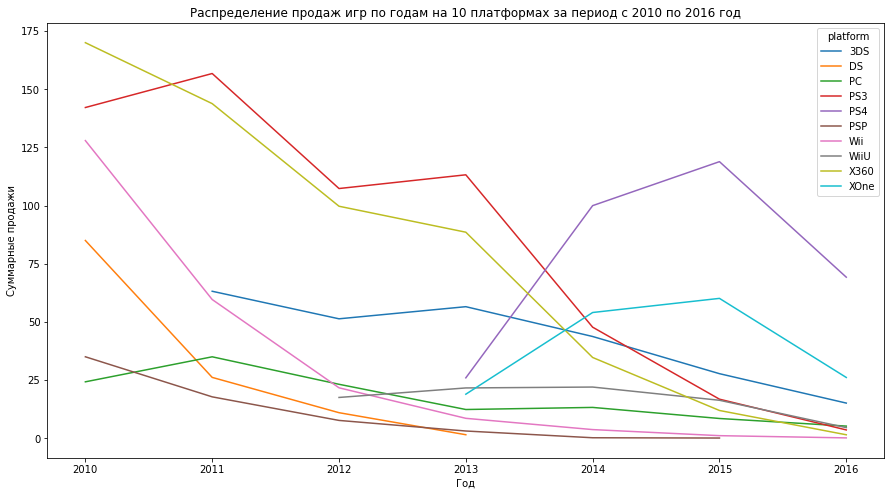

In [26]:
(data
 .query('year_of_release >= 2010 and platform in @top_platforms')
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(figsize=(15, 8), legend=True)
)
plt.title('Распределение продаж игр по годам на 10 платформах за период с 2010 по 2016 год')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

На графике заметен спад продаж игр на всех платформах в 2016 году. Можно отметить рост продаж у потенциально прибыльных платформ PS4 и XOne, который продолжался с 2013 по 2015 год, затем у этих платформ пошел резкий спад. Можно прогнозировать дальнейшее падение продаж игр на этих платформах в 2017 году в связи с постепенным устареванием платформ. Рост продаж в дальнейшем могут показать игры на платформах PS и Xbox нового, девятого поколения (PS5 и Xbox Series X/S). 

В дальнейшем будем использовать данные за актуальный период, который определим с 2013 года, так как в этот год вышли платформы PS4 и XOne.

In [27]:
actual_data = data.query('year_of_release >= 2013')

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

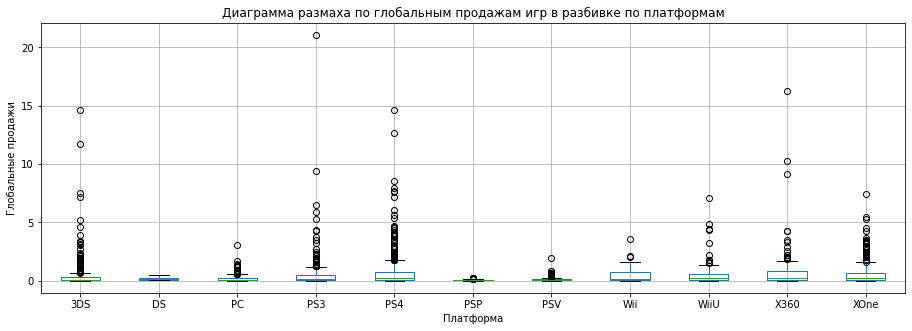

In [28]:
actual_data.boxplot(column = 'total_sales', by = 'platform', figsize = (15, 5))
plt.suptitle('') 
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

На диаграмме размаха можно заметить выбросы, особенно у платформ PS3, X360, PS4 и 3DS. Выбросы могут быть связаны с большими продажами популярных игр на этих платформах.

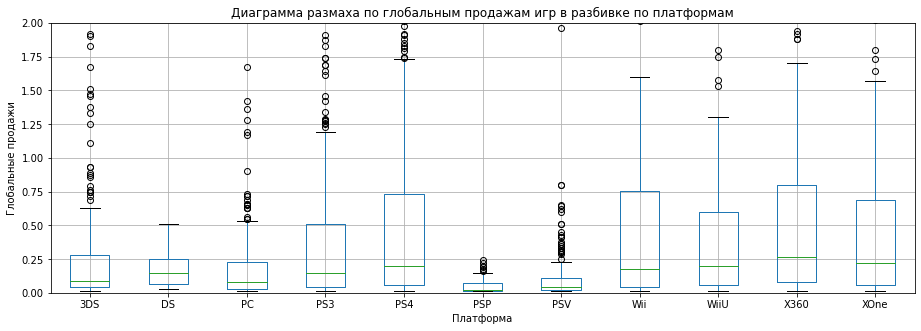

In [29]:
actual_data.boxplot(column = 'total_sales', by = 'platform', figsize = (15, 5))
plt.suptitle('') 
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2);

Также на диаграмме размаха можно увидеть, что медианное значение глобальных продаж у платформы X360 больше, чем у PS3, а у платформы XOne больше, чем у PS4.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Для построения диаграммы рассеяния и расчета корреляции выберем популярную платформу PS4.

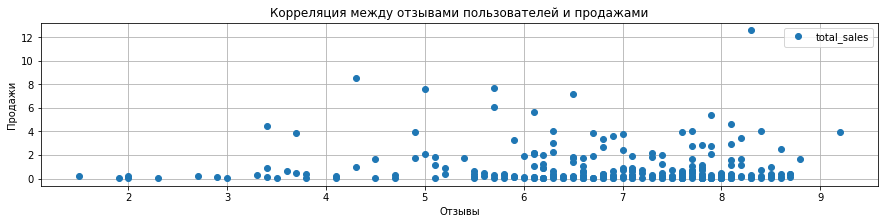

In [30]:
(actual_data
.query('platform == "PS4"')
.plot(x='user_score', y='total_sales', style='o', grid=True, figsize=(15, 3))
)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.xlabel('Отзывы')
plt.ylabel('Продажи');

In [31]:
actual_data.query('platform == "PS4"')['user_score'].corr(actual_data['total_sales'])

-0.031957110204556376

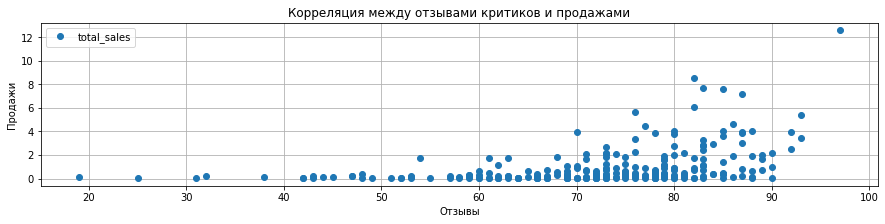

In [32]:
(actual_data
.query('platform == "PS4"')
.plot(x='critic_score', y='total_sales', style='o', grid=True, figsize=(15, 3))
)
plt.title('Корреляция между отзывами критиков и продажами')
plt.xlabel('Отзывы')
plt.ylabel('Продажи');

In [33]:
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data['total_sales'])

0.40656790206178095

У платформы PS4 корреляция выше между отзывами критиков и продажами, то есть при покупке игр пользователи больше обращают внимание на отзывы критиков, чем на отзывы других пользователей.

#### Соотнесем выводы с продажами игр на других платформах.

Построим диаграммы рассеяния для 5 других платформ: PS3, X360, 3DS, XOne, PC.

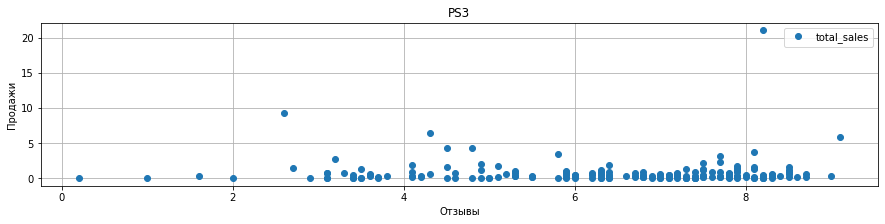

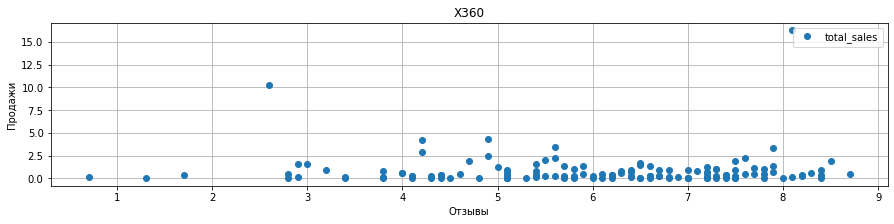

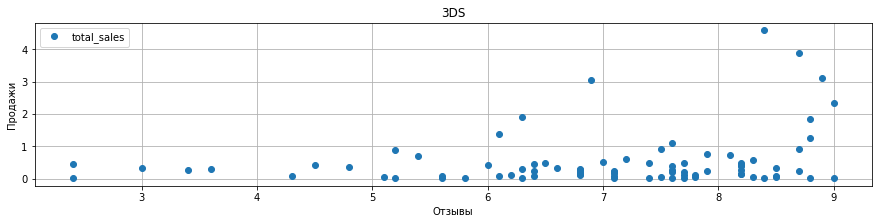

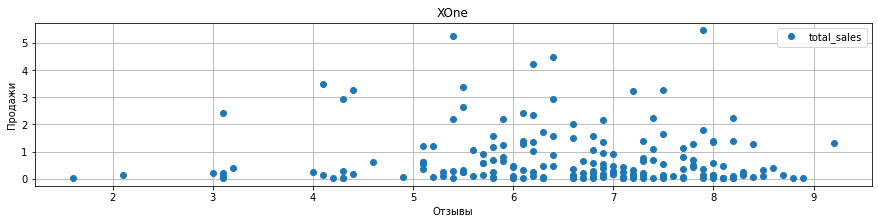

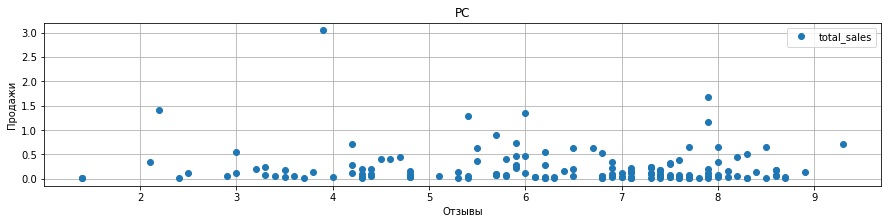

In [34]:
platforms = ["PS3", "X360", "3DS", "XOne", "PC"]
for i in platforms:
    actual_data[actual_data['platform'] == i].plot(x='user_score', y='total_sales', style='o', grid=True, figsize=(15, 3), legend=True)
    plt.title(i)
    plt.xlabel('Отзывы')
    plt.ylabel('Продажи')

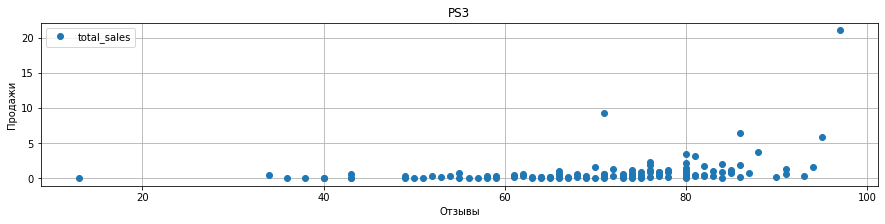

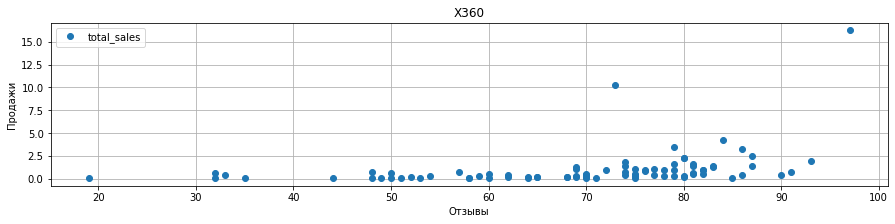

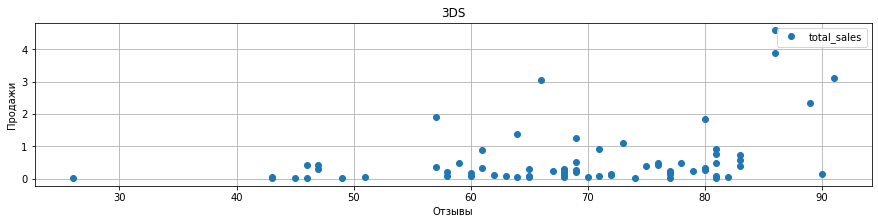

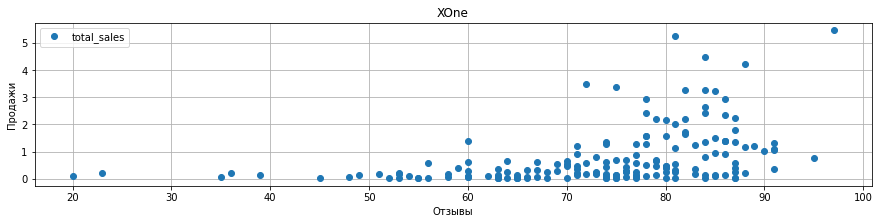

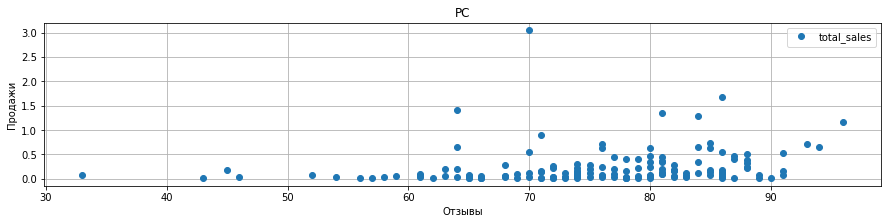

In [35]:
platforms = ["PS3", "X360", "3DS", "XOne", "PC"]
for i in platforms:
    actual_data[actual_data['platform'] == i].plot(x='critic_score', y='total_sales', style='o', grid=True, figsize=(15, 3), legend=True)
    plt.title(i)
    plt.xlabel('Отзывы')
    plt.ylabel('Продажи')

Посчитаем корреляцию для 5 других платформ: PS3, X360, 3DS, XOne, PC.

In [36]:
platforms = ["PS3", "X360", "3DS", "XOne", "PC"]
for i in platforms:
    print("Корреляция между отзывами пользователей и продажами у платформы", i, ":", actual_data[actual_data['platform'] == i]['user_score'].corr(actual_data['total_sales']))

Корреляция между отзывами пользователей и продажами у платформы PS3 : 0.0023944027357566925
Корреляция между отзывами пользователей и продажами у платформы X360 : -0.011742185147181342
Корреляция между отзывами пользователей и продажами у платформы 3DS : 0.24150411773563016
Корреляция между отзывами пользователей и продажами у платформы XOne : -0.06892505328279414
Корреляция между отзывами пользователей и продажами у платформы PC : -0.0938418695247674


In [37]:
platforms = ["PS3", "X360", "3DS", "XOne", "PC"]
for i in platforms:
    print("Корреляция между отзывами критиков и продажами у платформы", i,":", actual_data[actual_data['platform'] == i]['critic_score'].corr(actual_data['total_sales']))

Корреляция между отзывами критиков и продажами у платформы PS3 : 0.3342853393371919
Корреляция между отзывами критиков и продажами у платформы X360 : 0.3503445460228664
Корреляция между отзывами критиков и продажами у платформы 3DS : 0.3570566142288103
Корреляция между отзывами критиков и продажами у платформы XOne : 0.4169983280084017
Корреляция между отзывами критиков и продажами у платформы PC : 0.19603028294369382


На других платформах также корреляция выше между отзывами критиков и продажами. Это значит, что при покупке игр пользователи больше обращают внимание на отзывы критиков, чем на отзывы других пользователей.

#### Посмотрим на общее распределение игр по жанрам.

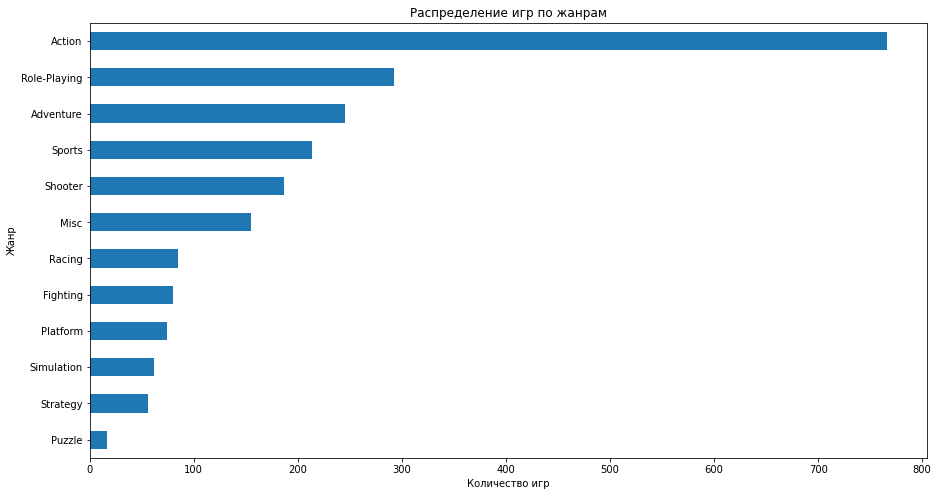

In [39]:
(actual_data
 .pivot_table(index='genre', values='name', aggfunc='count')
 .sort_values(by='name', ascending=True)
 .plot(y = 'name', kind = 'barh', figsize=(15, 8), legend=False)
)
plt.title('Распределение игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр');

Больше всего игр представлено в жанре Action, затем идут игры в жанрах Role-Playing, Adventure, Sports, Shooter и другие.

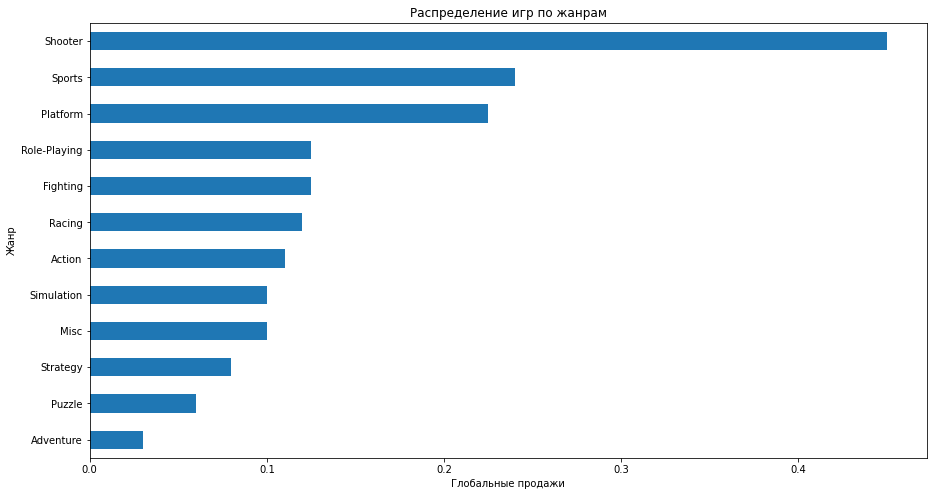

In [40]:
(actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values(by='total_sales', ascending=True)
 .plot(y='total_sales', kind='barh', figsize=(15, 8), legend=False)
)
plt.title('Распределение игр по жанрам')
plt.xlabel('Глобальные продажи')
plt.ylabel('Жанр');

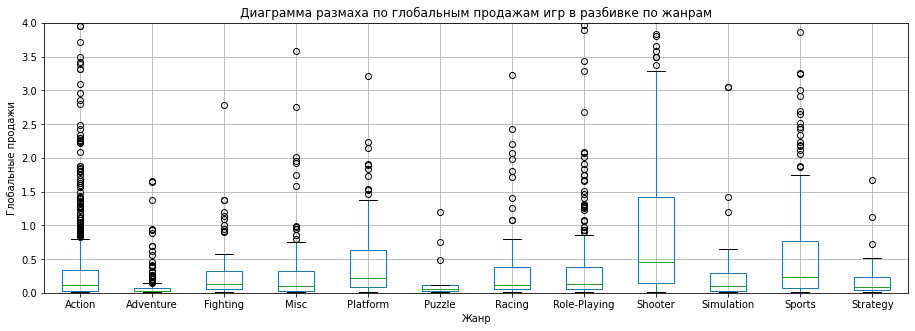

In [41]:
actual_data.boxplot(column='total_sales', by='genre', figsize=(15, 5))
plt.suptitle('') 
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 4);

Сравнение медианного значения глобальных продаж игр показывает, что самые высокие продажи – у игр в жанре Shooter, а самые низкие продажи – у игр в жанре Adventure, хотя в этом жанре выпускается довольно много игр.

**Вывод**

По результатам исследовательского анализа данных можно сделать следующие выводы:
- c 1994 года количество выпущенных игр резко увеличивается. Следущий скачок заметен в 2002 году, а в 2008 и 2009 наблюдается наибольшее количество игр. После 2009 года можно заметить спад количества выпущенных игр;
- примерно за 7 лет исчезают старые платформы и появляются новые;
- за период с 2010 по 2016 год были выбраны 10 платформ, которые лидируют по суммарным продажам: PS3, X360, PS4, 3DS, Wii, XOne, DS, PC, WiiU, PSP; 
- можно отметить рост продаж у потенциально прибыльных платформ PS4 и XOne, который продолжался с 2013 по 2015 год, затем у этих платформ пошел резкий спад, можно прогнозировать дальнейшее падение продаж игр на этих платформах в 2017 году в связи с постепенным устареванием платформ;
- медианное значение глобальных продаж у платформы X360 больше, чем у PS3, а у платформы XOne больше, чем у PS4;
- при покупке игр пользователи больше обращают внимание на отзывы критиков, чем на отзывы других пользователей;
- больше всего игр представлено в жанре Action, самые высокие продажи – у игр в жанре Shooter, а самые низкие продажи – у игр в жанре Adventure.

### Портрет пользователя каждого региона.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

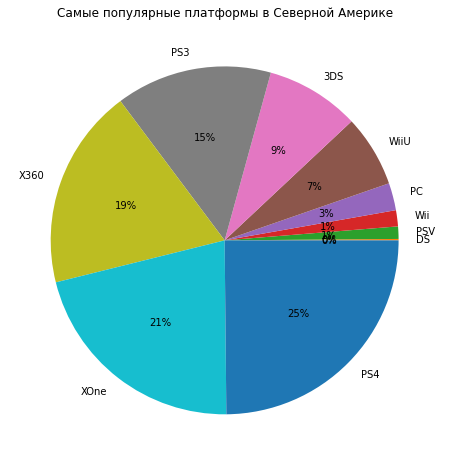

In [42]:
(actual_data
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=True)
 .plot(y='na_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные платформы в Северной Америке')
plt.ylabel('');

Топ-5 самых популярных платформ в Северной Америке: PS4, XOne, X360, PS3 и 3DS.

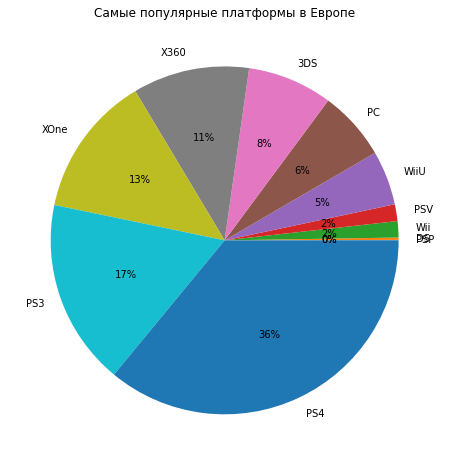

In [43]:
(actual_data
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=True)
 .plot(y='eu_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные платформы в Европе')
plt.ylabel('');

Топ-5 самых популярных платформ в Европе: PS4, PS3, XOne, X360 и 3DS.

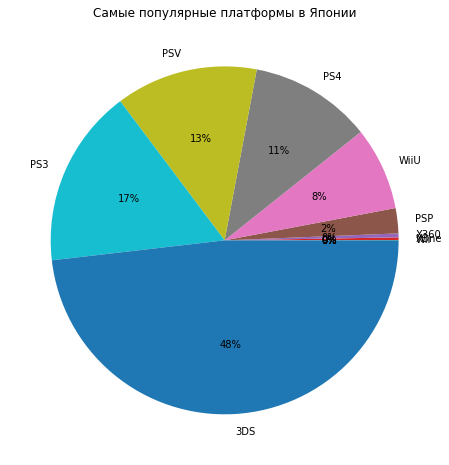

In [44]:
(actual_data
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=True)
 .plot(y='jp_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные платформы в Японии')
plt.ylabel('');

Топ-5 самых популярных платформ в Японии: 3DS, PS3, PSV, PS4 и WiiU.

В Северной Америке и в Европе самыми популярными являются платформы Playstation и Xbox. В Японии самой популярной является платформа 3DS японской компании Nintendo, затем идут платформы Playstation, которые гораздо популярнее платформ Xbox.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

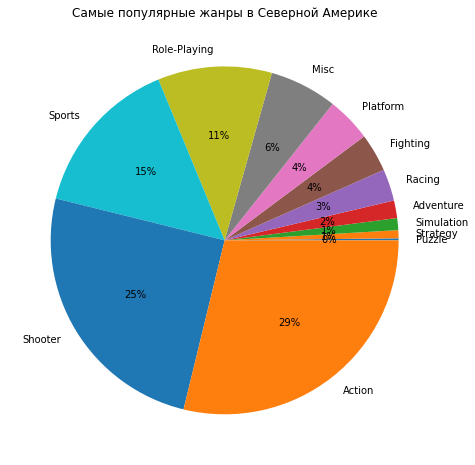

In [45]:
(actual_data
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=True)
 .plot(y='na_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные жанры в Северной Америке')
plt.ylabel('');

Топ-5 самых популярных жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc.

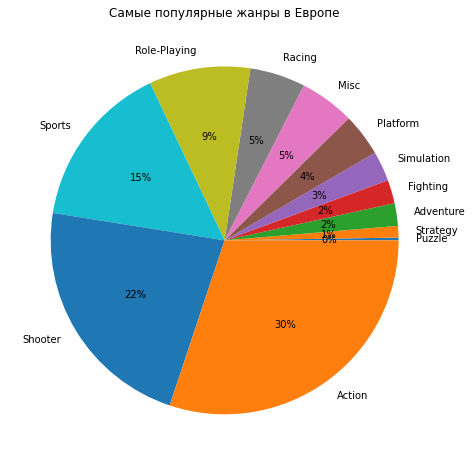

In [46]:
(actual_data
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=True)
 .plot(y='eu_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные жанры в Европе')
plt.ylabel('');

Топ-5 самых популярных жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing.

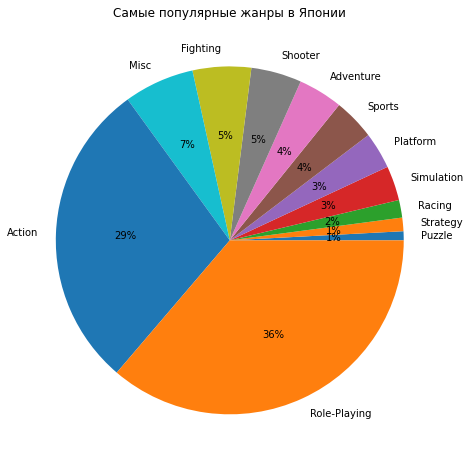

In [47]:
(actual_data
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=True)
 .plot(y='jp_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Самые популярные жанры в Японии')
plt.ylabel('');

Топ-5 самых популярных жанров в Японии: Role-Playing, Action, Misc, Fighting, Shooter.

Как в Северной Америке, так и в Европе популярными являются жанры Action, Shooter, Sports, Role-Playing, Misc/Racing. В Японии другая картина, на первом месте – жанр Role-Playing, затем идут жанры Action, Misc, Fighting, Shooter. Разница может быть связана с большим количеством оригинальных японских игр в жанрах Role-Playing, Action и Fighting.

#### Определим для пользователя каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи.

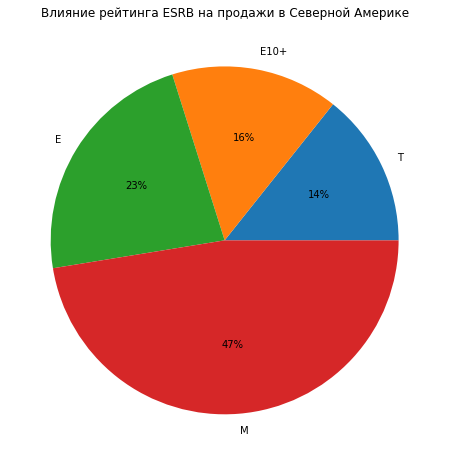

In [48]:
(actual_data
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=True)
 .plot(y='na_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.ylabel('');

В Северной Америке больше всего продаются игры в категории M("Для взрослых"), затем идут игры в категориях для детей разных возрастов.

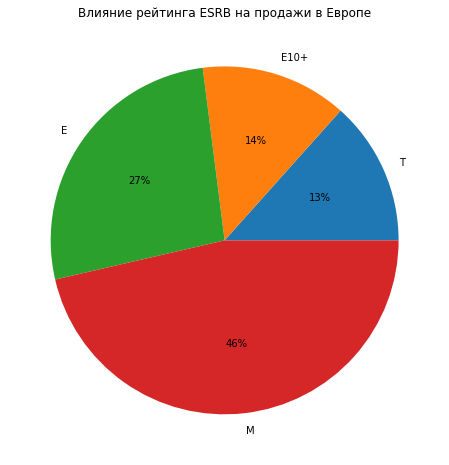

In [49]:
(actual_data
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=True)
 .plot(y='eu_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.ylabel('');

В Европе тоже больше всего продаются игры в категории M("Для взрослых"), затем идут игры в категориях для детей разных возрастов.

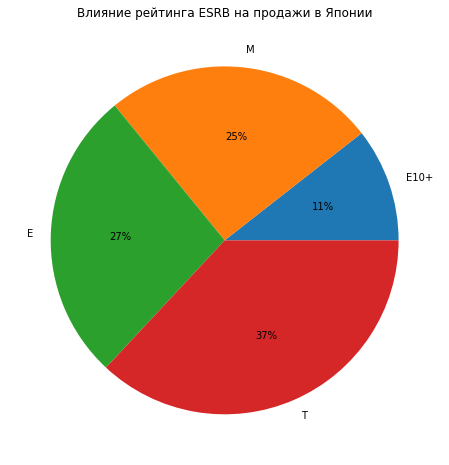

In [50]:
(actual_data
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=True)
 .plot(y='jp_sales', kind = 'pie', autopct='%1.0f%%', figsize=(8, 8), legend=False)
)
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.ylabel('');

В отличие от Северной Америки и Европы, в Японии другая картина – на первом месте по продажам находятся игры в категории T("Для подростков"), затем идут игры в категории M("Для взрослых") и игры для детей младшего возраста. Нужно учитывать, что в данных содержатся пропуски в рейтинге ESRB.

**Вывод**

Портрет пользователя из Северной Америки похож на портрет пользователя из Европы, в этих регионах популярны платформы Playstation и Xbox, игры в жанрах Action, Shooter, Sports, Role-Playing, Misc/Racing в категории M("Для взрослых").

Портрет пользователя из Японии отличается, в этом регионе популярна платформа 3DS, игры в жанрах Role-Playing, Action, Misc, Fighting, Shooter в категории T("Для подростков").

### Проверка гипотез.

#### Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки гипотезы будем использовать t-тест, так как нам нужно проверить равенство двух генеральных совокупностей, которые не зависят друг от друга. Проверим размер выборок.

In [52]:
data_xone = actual_data.dropna(subset=['user_score']).query('platform == "XOne"')
data_pc = actual_data.dropna(subset=['user_score']).query('platform == "PC"')
print('Размер выборки для платформы Xbox One:', len(data_xone))
print('Размер выборки для платформы PC:', len(data_pc))

Размер выборки для платформы Xbox One: 182
Размер выборки для платформы PC: 155


Так как выборки у платформы Xbox One и у платформы PC разного размера, зададим дополнительный параметр equal_var=False.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [53]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

result2 = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False)

print('p-значение:', result2.pvalue)

if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [54]:
print('Среднее значение оценок пользователей для платформы Xbox One:', round(data_xone['user_score'].mean(),1))
print('Среднее значение оценок пользователей для платформы PC:', round(data_pc['user_score'].mean(),1))

Среднее значение оценок пользователей для платформы Xbox One: 6.5
Среднее значение оценок пользователей для платформы PC: 6.3


#### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы будем использовать t-тест, так как нам нужно проверить равенство двух генеральных совокупностей, которые не зависят друг от друга. Проверим размер выборок.

In [55]:
data_action = actual_data.dropna(subset=['user_score']).query('genre == "Action"')
data_sports = actual_data.dropna(subset=['user_score']).query('genre == "Sports"')
print('Размер выборки для жанра Action:', len(data_action))
print('Размер выборки для жанра Sports:', len(data_sports))

Размер выборки для жанра Action: 389
Размер выборки для жанра Sports: 160


Так как выборки у платформы Xbox One и у платформы PC разного размера, зададим дополнительный параметр equal_var=False.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [56]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

result1 = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)

print('p-значение:', result1.pvalue)

if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

In [57]:
print('Среднее значение оценок пользователей жанра Action:', round(data_action['user_score'].mean(),1))
print('Среднее значение оценок пользователей жанра Sports:', round(data_sports['user_score'].mean(),1))

Среднее значение оценок пользователей жанра Action: 6.8
Среднее значение оценок пользователей жанра Sports: 5.2


**Вывод**

По результатам проверки двух гипотез есть основания говорить, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод.

Целью исследования было проанализировать данные о компьютерных играх для выявления закономерностей, определяющих успешность игры.

Была изучена таблица с исходными данными, в которых содержится информация о компьютерных играх. Часть данных описывает различные характеристики самой игры: название, платформа, год выпуска, жанр. Часть данных описывает продажи игр: продажи в Северной Америке, в Европе, в Японии и в других странах. Остальные данные рассказывают об оценках: оценка критиков, оценка пользователей и рейтинг от организации ESRB. На этапе предобработки данных названия всех стобцов были приведены к нижнему регистру. В 6 столбцах были выявлены пропущенные значения, в 3 из них строчки с пропущенными значениями были удалены. В двух столбцах был преобразован тип данных. Также были обнаружены и удалены неявные дубликаты и добавлен столбец с суммарными продажами во всех регионах.

По результатам исследовательского анализа данных можно сделать следующие выводы:
- c 1994 года количество выпущенных игр резко увеличивается. Следущий скачок заметен в 2002 году, а в 2008 и 2009 наблюдается наибольшее количество игр. После 2009 года можно заметить спад количества выпущенных игр;
- примерно за 7 лет исчезают старые платформы и появляются новые;
- за период с 2010 по 2016 год были выбраны 10 платформ, которые лидируют по суммарным продажам: PS3, X360, PS4, 3DS, Wii, XOne, DS, PC, WiiU, PSP; 
- можно отметить рост продаж у потенциально прибыльных платформ PS4 и XOne, который продолжался с 2013 по 2015 год, затем у этих платформ пошел резкий спад, можно прогнозировать дальнейшее падение продаж игр на этих платформах в 2017 году в связи с постепенным устареванием платформ;
- медианное значение глобальных продаж у платформы X360 больше, чем у PS3, а у платформы XOne больше, чем у PS4;
- при покупке игр пользователи больше обращают внимание на отзывы критиков, чем на отзывы других пользователей;
- больше всего игр представлено в жанре Action, самые высокие продажи – у игр в жанре Shooter, а самые низкие продажи – у игр в жанре Adventure.

Портрет пользователя из Северной Америки похож на портрет пользователя из Европы, в этих регионах популярны платформы Playstation и Xbox и игры в жанрах Action, Shooter, Sports, Role-Playing, Misc/Racing в категории M("Для взрослых").

Портрет пользователя из Японии отличается, в этом регионе популярна платформа 3DS и игры в жанрах Role-Playing, Action, Misc, Fighting, Shooter в категории T("Для подростков").

По результатам проверки двух гипотез есть основания говорить, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

При планировании рекламного бюджета можно сделать ставку на игры в жанрах Action и Shooter на платформах PS4 и XOne с рейтингом M("Для взрослых") по ESRB. Рекламировать рекомендуется в Северной Америке и в Европе, следует обратить особое внимание на отзывы критиков, так как их учитывают пользователи при покупке игр.